In [ ]:
import os 
import csv
import json
from collections import Counter



# Move to the survey results directory 
data_dir = '../../data'
os.chdir(data_dir)

### Creating, evaluating and manipulating annotator books 

In [3]:
#############################
# Create annotator books
#############################
def csv_to_json(csv_file, output_file, n_responses=500, start_column=0, end_column=None):
    result = {}

    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        
        # Read the first row (column descriptions)
        first_row = next(reader)
        
        # Read the second row (keys for our JSON)
        keys = next(reader)
        
        # Adjust end_column if not specified
        if end_column is None:
            end_column = len(keys)
        
        # Initialize result dictionary with empty lists for each key
        for i, key in enumerate(keys[start_column:end_column], start=start_column):
            full_key = f"{first_row[i]}: {key}"
            result[full_key] = []
        
        # Process each subsequent row
        for row in reader:
            for col_index, value in enumerate(row[start_column:end_column], start=start_column):
                if value.strip():  # Only include non-empty values
                    full_key = f"{first_row[col_index]}: {keys[col_index]}"
                    if len(result[full_key]) < n_responses:
                        result[full_key].append({
                            "text": value,
                            "theme": [],
                            "codes": []
                        })
        
        # Remove empty lists from the result
        result = {k: v for k, v in result.items() if v}

    # Write to JSON file
    with open(output_file, 'w', encoding='utf-8') as json_file:
        json.dump(result, json_file, indent=2, ensure_ascii=False)
    
    print(f"Created: {output_file}")

# Usage remains the same
csv_file_path = 'AI_Study_Accepted_With_replacement_codes.csv'
output_file_path = '../Annotations/Annotator_C.json'
n_responses = 420
start_column = 229
end_column = 240

csv_to_json(csv_file_path, output_file_path, n_responses, start_column, end_column)

Created: ../Annotations/Annotator_C.json


In [1]:
#################################
# Review theme and code percentages
##################################
def process_json_data(filepath):
    with open(filepath, 'r', encoding='latin-1') as f:
        data = json.load(f)

    output_data = {}

    for question_key, entries in data.items():
        theme_counts = {}
        code_counts = {}
        total_answers = 0
        no_theme_count = 0

        for entry in entries:
            total_answers += 1

            if not entry.get("theme", []):  # Check for no theme
                no_theme_count += 1
            else:
                for theme in entry.get("theme", []):
                    if theme:
                        theme_counts[theme] = theme_counts.get(theme, 0) + 1

            for code in entry.get("codes", []):
                if code:
                    code_counts[code] = code_counts.get(code, 0) + 1

        theme_list = []
        for theme, count in theme_counts.items():
            percentage = (count / total_answers) * 100 if total_answers > 0 else 0
            theme_list.append({
                "theme": theme,
                "count": count,
                "percentage": round(percentage, 2)
            })

        # Add no theme information
        if no_theme_count > 0 and no_theme_count != total_answers:  # Only if not all of them are no theme
            no_theme_percentage = (no_theme_count / total_answers) * 100
            theme_list.append({
                "theme": "No Theme",
                "count": no_theme_count,
                "percentage": round(no_theme_percentage, 2)
            })
        elif no_theme_count == total_answers: # If all of them have no theme
            no_theme_percentage = (no_theme_count / total_answers) * 100
            theme_list.append({
                "theme": "No Theme",
                "count": no_theme_count,
                "percentage": round(no_theme_percentage, 2)
            })
        

        code_list = []
        for code, count in code_counts.items():
            percentage = (count / total_answers) * 100 if total_answers > 0 else 0
            code_list.append({
                "code": code,
                "count": count,
                "percentage": round(percentage, 2)
            })

        output_data[question_key] = {
            "themes": theme_list,
            "codes": code_list
        }

    return json.dumps(output_data, indent=4)

filepath = 'annotations/annotator_b.json'
output_json = process_json_data(filepath)

if output_json:
    print(output_json)
    with open('output.json', 'w') as outfile:
        outfile.write(output_json)

{
    "B.1.1: How do you define AI within your industry? Briefly explain in your own words.": {
        "themes": [
            {
                "theme": "Digital Assistance",
                "count": 8,
                "percentage": 3.29
            },
            {
                "theme": "Process Automation",
                "count": 69,
                "percentage": 28.4
            },
            {
                "theme": "Performance Improvement",
                "count": 34,
                "percentage": 13.99
            },
            {
                "theme": "Content Creation",
                "count": 24,
                "percentage": 9.88
            },
            {
                "theme": "Prediction",
                "count": 13,
                "percentage": 5.35
            },
            {
                "theme": "Content Synthesis",
                "count": 33,
                "percentage": 13.58
            },
            {
                "theme": "Detection

#### Annotator books with replacement codes (merge demographics whose chose "other, please specify")

In [ ]:
#############################
# Create annotator books with with codes for demographic replacements
#############################
def csv_to_json(csv_file, output_file, n_responses=50, start_column=0, end_column=None):
    result = {}

    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        
        # Read the first row (column descriptions)
        first_row = next(reader)
        
        # Read the second row (keys for our JSON)
        keys = next(reader)
        
        # Adjust end_column if not specified
        if end_column is None:
            end_column = len(keys)
        
        # Initialize result dictionary with empty lists for each key
        for i, key in enumerate(keys[start_column:end_column], start=start_column):
            full_key = f"{first_row[i]}: {key}"
            result[full_key] = []
        
        # Temporary storage for all values in each column
        all_values = {full_key: [] for full_key in result.keys()}
        
        # Process each subsequent row
        for row_num, row in enumerate(reader, start=3):  # Start from 3 because we've already read two rows
            for col_index, value in enumerate(row[start_column:end_column], start=start_column):
                if value.strip():  # Only include non-empty values
                    full_key = f"{first_row[col_index]}: {keys[col_index]}"
                    all_values[full_key].append((value, row_num))
        
        # Filter out columns with more than 3 identical entries
        for full_key, values in all_values.items():
            value_counts = Counter(value for value, _ in values)
            if max(value_counts.values(), default=0) <= 3:
                # Keep only unique values up to n_responses
                unique_values = list(dict.fromkeys(values))[:n_responses]
                result[full_key] = [
                    {
                        "text": value,
                        "codes": [],
                        "replacement_codes": [],
                        "row_number": row_num
                    } for value, row_num in unique_values
                ]
    
    # Remove empty lists from the result
    result = {k: v for k, v in result.items() if v}

    # Write to JSON file
    with open(output_file, 'w', encoding='utf-8') as json_file:
        json.dump(result, json_file, indent=2, ensure_ascii=False)
    
    print(f"Created: {output_file}")

# Usage
csv_file_path = 'AI_Study_Accepted_With_Replacement_Codes.csv'
output_file_path = 'AI_Study_Demographics_Other.json'
n_responses = 200
start_column = 17
end_column = 34

csv_to_json(csv_file_path, output_file_path, n_responses, start_column, end_column)

In [ ]:
#############################
# Map replacement codes back to original CSV
#############################
def map_codes_to_csv(input_csv, input_json, output_csv):
    # Read the JSON file
    with open(input_json, 'r', encoding='utf-8') as json_file:
        json_data = json.load(json_file)
    
    # Create a dictionary to store replacement codes for each row and column
    codes_map = {}
    for key, items in json_data.items():
        for item in items:
            row_num = item['row_number']
            replacement_codes = item.get('replacement_codes', [])
            if replacement_codes:
                if row_num not in codes_map:
                    codes_map[row_num] = {}
                codes_map[row_num][key] = ', '.join(replacement_codes)
    
    # Read the input CSV and write to the output CSV with replacement codes
    with open(input_csv, 'r', newline='', encoding='utf-8') as infile, \
         open(output_csv, 'w', newline='', encoding='utf-8') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        
        # Write the header rows as is
        header_rows = [next(reader) for _ in range(2)]
        writer.writerows(header_rows)
        
        # Process data rows
        for row_num, row in enumerate(reader, start=3):
            new_row = list(row)
            if row_num in codes_map:
                for i in range(1, len(row)):  # Start from 1 to avoid the first column
                    full_key = f"{header_rows[0][i]}: {header_rows[1][i]}"
                    if full_key in codes_map[row_num]:
                        new_row[i-1] = codes_map[row_num][full_key]
            writer.writerow(new_row)
    
    print(f"Created: {output_csv}")

# Usage
input_csv = 'AI_Study_Prolific_Reviewed_Accepted.csv'
input_json = 'AI_Study_Demographics_Other.json'
output_csv = 'AI_Study_Accepted_with_replacement_codes.csv'

map_codes_to_csv(input_csv, input_json, output_csv)

### Inter-Annotator Agreement Scores

In [7]:
from sklearn.metrics import cohen_kappa_score
import itertools

# Function to load JSON data
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        return json.load(file)

# Function to filter based on start and end object names
def filter_objects(data, start_obj=None, end_obj=None):
    keys = list(data.keys())
    if start_obj and end_obj:
        try:
            start_idx = keys.index(start_obj)
            end_idx = keys.index(end_obj) + 1
            return {key: data[key] for key in keys[start_idx:end_idx]}
        except ValueError:
            print("Start or End object not found in data. Returning all data.")
            return data
    return data

# Function to compare themes and codes, ignoring empty ones
def compare_annotations(data1, data2):
    labels1 = []
    labels2 = []

    # Iterate over keys in both datasets
    for key in data1.keys():
        if key in data2:
            items1 = data1[key]
            items2 = data2[key]
            
            # Compare themes and codes for items in both files
            for item1, item2 in zip(items1, items2):
                theme1, codes1 = item1.get('theme', []), item1.get('codes', [])
                theme2, codes2 = item2.get('theme', []), item2.get('codes', [])

                # Only consider non-empty themes and codes
                if theme1 and theme2:
                    labels1.append(','.join(sorted(theme1)))
                    labels2.append(','.join(sorted(theme2)))

                if codes1 and codes2:
                    labels1.append(','.join(sorted(codes1)))
                    labels2.append(','.join(sorted(codes2)))

    return labels1, labels2

# Function to calculate Cohen's Kappa
def calculate_kappa(labels1, labels2):
    if len(labels1) != len(labels2):
        print("Warning: Label lengths are not equal. Kappa score may not be valid.")
    return cohen_kappa_score(labels1, labels2)

# File paths
file1 = 'b-track_prolific_qualitative.json'  # Replace with actual file path for annotator 1
file2 = 'annotations/10_3_Ersi_b-track_prolific_qualitative.json'  # Replace with path to the second file

# Optional variables for start and end object
start_object = "B.2.6 Please describe any challenges you’ve encountered in these mitigation efforts and how you overcame them."
end_object = "B.3.9: Briefly describe risks to the Environment and Social Responsibility principle posed by developing or deploying AI systems in your company and the steps you take to mitigate them."

# Load both JSON files
data1 = load_json(file1)
data2 = load_json(file2)

# Print the keys to confirm start and end object names
print("Available keys in file 1:", list(data1.keys()))
print("Available keys in file 2:", list(data2.keys()))

# Filter based on start and end object names
filtered_data1 = filter_objects(data1, start_object, end_object)
filtered_data2 = filter_objects(data2, start_object, end_object)

# Compare themes and codes
labels1, labels2 = compare_annotations(filtered_data1, filtered_data2)

# Check if there are labels to compare
if labels1 and labels2:
    # Calculate Cohen's Kappa
    kappa_score = calculate_kappa(labels1, labels2)
    print(f"Cohen's Kappa Score: {kappa_score}")
else:
    print("No labels to compare. Unable to calculate Cohen's Kappa.")


Available keys in file 1: ['B.2.6 Please describe any challenges youâ\x80\x99ve encountered in these mitigation efforts and how you overcame them.', "B.3.1 : Briefly describe risks to the Respect for Human Rights principle posed by developing or deploying AI systems in your company and the steps you take to mitigate them.\n\n\n\n- Please write â\x80\x9cnot applicable (NA)â\x80\x9d if you don't consider this principle, or write â\x80\x9cprefer not to say (PnS)â\x80\x9d if you cannot answer.", "B.3.2: Briefly describe risks to the Data Protection and Right to Privacy principle posed by developing or deploying AI systems in your company and the steps you take to mitigate them.\n\n\n\n- Please write â\x80\x9cnot applicable (NA)â\x80\x9d if you don't consider this principle, or write â\x80\x9cprefer not to say (PnS)â\x80\x9d if you cannot answer.", "B.3.3: Briefly describe risks to the Harm Prevention and Beneficence principle posed by developing or deploying AI systems in your company and 

### Merge annotator books


In [34]:
import json
import copy

def merge_annotator_books(primary_file, secondary_file, output_file):
    """
    Merge two annotator books while preserving exact JSON structure, including array formats
    for themes and codes. Guarantees that existing entries maintain their exact format and
    new entries follow the same structure.
    
    Args:
        primary_file (str): Path to the primary JSON annotator book (format will be preserved exactly)
        secondary_file (str): Path to the secondary JSON annotator book (new entries will be added)
        output_file (str): Path where the merged JSON will be saved
    """
    # Read the primary annotator book with exact formatting preserved
    with open(primary_file, 'r', encoding='utf-8') as f:
        primary_data = json.load(f)
    
    # Create a deep copy to ensure we don't accidentally modify the original
    merged_data = copy.deepcopy(primary_data)
    
    # Read the secondary annotator book
    with open(secondary_file, 'r', encoding='utf-8') as f:
        secondary_data = json.load(f)
    
    # Track statistics
    total_new_entries = 0
    new_questions = 0
    
    # For each question in the secondary book
    for question, responses in secondary_data.items():
        # If the question doesn't exist in primary, add it with all its responses
        if question not in merged_data:
            # Ensure each response has properly formatted arrays
            formatted_responses = []
            for response in responses:
                formatted_response = {
                    "text": response["text"],
                    "theme": response.get("theme", []),  # Ensure it's always an array
                    "codes": response.get("codes", [])   # Ensure it's always an array
                }
                formatted_responses.append(formatted_response)
            merged_data[question] = formatted_responses
            total_new_entries += len(responses)
            new_questions += 1
        else:
            # Create a set of existing response texts for this question
            existing_texts = {resp["text"] for resp in merged_data[question]}
            
            # Add only new responses
            for response in responses:
                if response["text"] not in existing_texts:
                    # Ensure new entries match the array format
                    new_entry = {
                        "text": response["text"],
                        "theme": [],  # Empty array, not null or missing
                        "codes": []   # Empty array, not null or missing
                    }
                    merged_data[question].append(new_entry)
                    existing_texts.add(response["text"])
                    total_new_entries += 1
    
    # Verify preservation of primary data and array formats
    for question, responses in primary_data.items():
        for i, original_response in enumerate(responses):
            merged_response = merged_data[question][i]
            assert original_response == merged_response, f"Error: Primary data was modified for question {question}"
            assert isinstance(merged_response["theme"], list), f"Error: Theme is not an array for question {question}"
            assert isinstance(merged_response["codes"], list), f"Error: Codes is not an array for question {question}"
    
    # Write the merged data to the output file with consistent formatting
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(merged_data, f, indent=2, ensure_ascii=False)
    
    print(f"\nMerge completed successfully!")
    print(f"Output saved to: {output_file}")
    print(f"\nStatistics:")
    print(f"New questions added: {new_questions}")
    print(f"New entries added: {total_new_entries}")
    print(f"All existing entries preserved with exact array formatting for themes and codes.")

merge_annotator_books(
     'b-track_prolific_qualitative_wilder.json',
     'Annotator_B.json',
     'Merged_Annotator_Book.json'
 )

Analysis complete. Results saved to themes_and_codes.json


### Create theme and code analysis 

C:\Users\Baldw\AppData\Local\Temp\ipykernel_42036\3694302575.py:140: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  theme_handles = [plt.Rectangle((0, 0), 1, 1, color=theme_color_map[theme], edgecolor='black', linewidth=0.5)
C:\Users\Baldw\AppData\Local\Temp\ipykernel_42036\3694302575.py:144: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  code_handles = [plt.Rectangle((0, 0), 1, 1, color=code_color_map[code], edgecolor='black', linewidth=0.5)


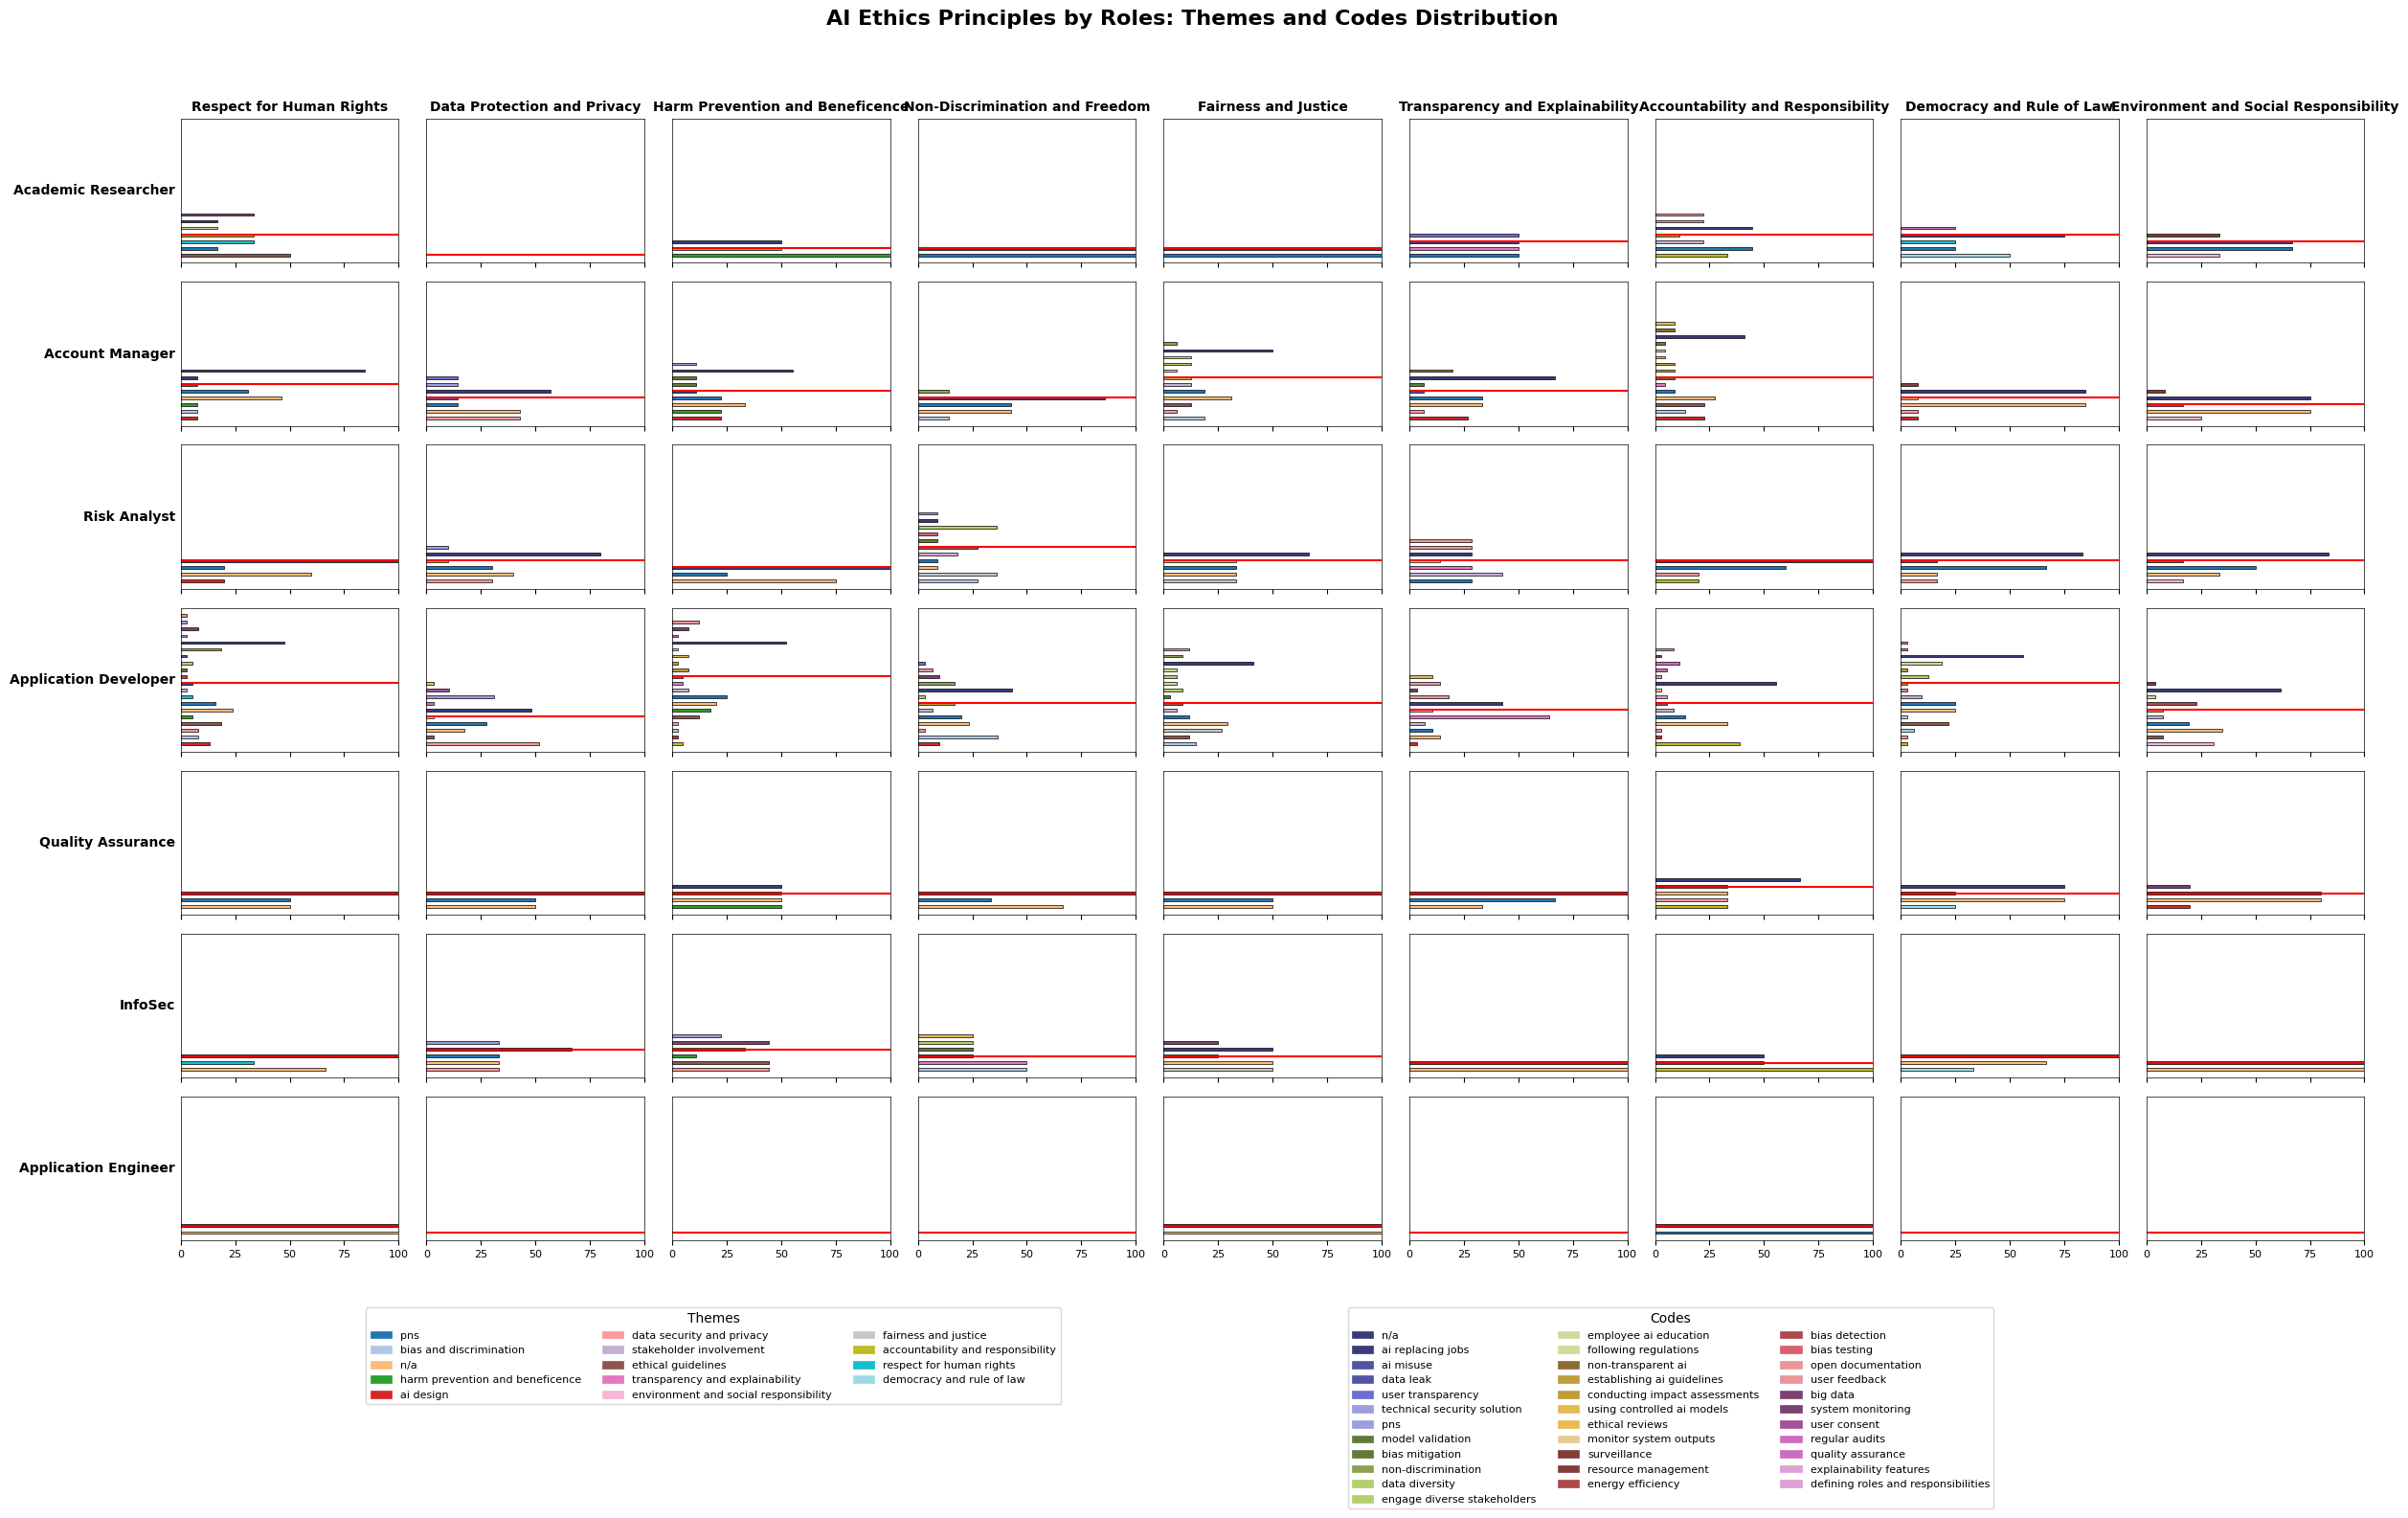

Analysis by Principle:
----- Respect for Human Rights -----
Themes:
  - ai design: 10.00%
  - bias and discrimination: 5.71%
  - data security and privacy: 4.29%
  - ethical guidelines: 14.29%
  - harm prevention and beneficence: 4.29%
  - n/a: 32.86%
  - pns: 20.00%
  - respect for human rights: 7.14%
  - stakeholder involvement: 1.43%

Codes:
  - ai misuse: 1.43%
  - ai replacing jobs: 4.29%
  - bias detection: 1.43%
  - bias mitigation: 1.43%
  - data diversity: 2.86%
  - data leak: 1.43%
  - establishing ai guidelines: 12.86%
  - following regulations: 1.43%
  - n/a: 61.43%
  - pns: 1.43%
  - system monitoring: 7.14%
  - technical security solution: 1.43%
  - user feedback: 1.43%


----- Data Protection and Privacy -----
Themes:
  - data security and privacy: 43.14%
  - ethical guidelines: 1.96%
  - n/a: 27.45%
  - pns: 27.45%

Codes:
  - conducting impact assessments: 1.96%
  - data leak: 1.96%
  - following regulations: 1.96%
  - n/a: 58.82%
  - regular audits: 1.96%
  - technica

In [11]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def print_analysis_by_principle(df, principle_names):
    """
    Prints a text summary of the theme and code distribution for each principle.
    """
    for principle in sorted(df['principle'].unique()):
        principle_label = principle_names.get(principle, f"Principle {principle}")
        print(f"----- {principle_label} -----")

        principle_data = df[df['principle'] == principle]

        theme_counts = principle_data.groupby('theme').size()
        total_themes = theme_counts.sum()
        theme_percentages = (theme_counts / total_themes) * 100 if total_themes > 0 else theme_counts

        code_counts = principle_data.groupby('codes').size()
        total_codes = code_counts.sum()
        code_percentages = (code_counts / total_codes) * 100 if total_codes > 0 else code_counts

        print("Themes:")
        for theme, percentage in theme_percentages.items():
            print(f"  - {theme}: {percentage:.2f}%")

        print("\nCodes:")
        for code, percentage in code_percentages.items():
            print(f"  - {code}: {percentage:.2f}%")
        print("\n")

def print_analysis_by_role(df, role_names):
    """
    Prints a text summary of the theme and code distribution for each role.
    """
    for role in sorted(df['role'].unique()):
        role_label = role_names.get(role, f"Role {role}")
        print(f"----- {role_label} -----")

        role_data = df[df['role'] == role]

        theme_counts = role_data.groupby('theme').size()
        total_themes = theme_counts.sum()
        theme_percentages = (theme_counts / total_themes) * 100 if total_themes > 0 else theme_counts

        code_counts = role_data.groupby('codes').size()
        total_codes = code_counts.sum()
        code_percentages = (code_counts / total_codes) * 100 if total_codes > 0 else code_counts

        print("Themes:")
        for theme, percentage in theme_percentages.items():
            print(f"  - {theme}: {percentage:.2f}%")

        print("\nCodes:")
        for code, percentage in code_percentages.items():
            print(f"  - {code}: {percentage:.2f}%")
        print("\n")
        
def print_analysis_by_role_and_principle(df, role_names, principle_names):
    """
    Prints a text summary of the theme and code distribution for each role and principle combination.
    """
    for role in sorted(df['role'].unique()):
        for principle in sorted(df['principle'].unique()):
            cell_data = df[(df['role'] == role) & (df['principle'] == principle)]
            role_label = role_names.get(role, f"Role {role}")
            principle_label = principle_names.get(principle, f"Principle {principle}")

            print(f"----- {role_label}, {principle_label} -----")

            theme_counts = cell_data.groupby('theme').size().reset_index(name='count')
            total_themes = theme_counts['count'].sum()
            theme_counts['percentage'] = (theme_counts['count'] / total_themes) * 100 if total_themes > 0 else 0

            code_counts = cell_data.groupby('codes').size().reset_index(name='count')
            total_codes = code_counts['count'].sum()
            code_counts['percentage'] = (code_counts['count'] / total_codes) * 100 if total_codes > 0 else 0

            print("Themes:")
            if not theme_counts.empty:
                for index, row in theme_counts.iterrows():
                    print(f"  - {row['theme']}: {row['percentage']:.2f}%")
            else:
                print("  - N/A")

            print("\nCodes:")
            if not code_counts.empty:
                for index, row in code_counts.iterrows():
                    print(f"  - {row['codes']}: {row['percentage']:.2f}%")
            else:
                print("  - N/A")

            print("\n")

role_names = {
    '3': 'Account Manager',
    '4': 'Risk Analyst',
    '5': 'Application Developer',
    '6': 'Quality Assurance',
    '7': 'InfoSec',
    '8': 'Application Engineer',
    '15': 'Academic Researcher'
}

# Create graph
create_principle_role_graph('Annotations/Annotator_B_Ersi-Wilder_Risk_Mitigation.json', role_names, principle_names)

# Print data summary after creating the graph
with open('Annotations/Annotator_B_Ersi-Wilder_Risk_Mitigation.json', 'r', encoding='latin-1') as f:
    data = json.load(f)

extracted_data = []
for key, values in data.items():
    parts = key.split(":")
    if len(parts) > 1:
        role_principle = parts[0].split(".")
        if len(role_principle) == 3 and role_principle[0] == 'B':
            role = role_principle[1]
            principle = role_principle[2]

            for item in values:
                themes = item.get('theme', [])
                codes = [c for c in item.get('codes', []) if c != "HIGHLIGHTER"]

                if not themes:
                    themes = ['N/A']
                if not codes:
                    codes = ['N/A']
                for theme in themes:
                    for code in codes:
                        extracted_data.append({
                            'role': role,
                            'principle': principle,
                            'theme': theme.lower(),
                            'codes': code.lower()
                        })

df = pd.DataFrame(extracted_data)

print("Analysis by Principle:")
print_analysis_by_principle(df, principle_names)

print("Analysis by Role:")
print_analysis_by_role(df, role_names)

print("Analysis by Role and Principle:")
print_analysis_by_role_and_principle(df, role_names, principle_names)

In [1]:
import json
import pandas as pd

def display_theme_and_code_distribution(json_file_path, role_names, principle_names):
    """
    Reads a JSON file, processes the data, and displays the distribution of themes and codes
    for each role and principle in text format. Handles multiple themes and codes per response.
    Percentages are calculated based on the total number of responses within each role-principle category.

    Args:
        json_file_path: The path to the JSON file.
        role_names: A dictionary mapping role numbers to role names.
        principle_names: A dictionary mapping principle numbers to principle names.
    """
    try:
        with open(json_file_path, 'r', encoding='latin-1') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"Error: File not found at {json_file_path}")
        return
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in {json_file_path}")
        return

    # Prepare data for analysis
    processed_data = {}
    for key, value in data.items():
        parts = key.split(':')
        role_principle = parts[0].strip()

        try:
            role_num = role_principle.split('.')[1]
            principle_num = role_principle.split('.')[2]
            
            role = role_names.get(role_num, f"Role {role_num}")
            principle = principle_names.get(principle_num, f"Principle {principle_num}")
            
        except IndexError:
            print(f"Skipping invalid key (IndexError): {key}")
            continue

        if role not in processed_data:
            processed_data[role] = {}
        if principle not in processed_data[role]:
            processed_data[role][principle] = {"themes": {}, "codes": {}, "total_responses": 0}

        for item in value:
            processed_data[role][principle]["total_responses"] += 1

            # Handle multiple themes
            if 'theme' in item and item['theme']:
                themes = item['theme']  # Assume 'theme' can be a list
            else:
                themes = ["No Theme"]

            for theme in themes:
                if theme not in processed_data[role][principle]["themes"]:
                    processed_data[role][principle]["themes"][theme] = 0
                processed_data[role][principle]["themes"][theme] += 1

            # Handle multiple codes (still ensuring uniqueness per response)
            unique_codes = set()
            for code in item['codes']:
                unique_codes.add(code)
            
            for code in unique_codes:
                if code not in processed_data[role][principle]["codes"]:
                    processed_data[role][principle]["codes"][code] = 0
                processed_data[role][principle]["codes"][code] += 1

    # Display the initial distribution
    for role, principles in processed_data.items():
        print(f"\nRole: {role}")
        for principle, counts in principles.items():
            print(f"  Principle: {principle}")
            total_responses = counts["total_responses"]

            if total_responses == 0:
                print("    No responses for this role-principle combination.")
                continue

            print("    Themes:")
            for theme, theme_count in counts["themes"].items():
                theme_percentage = (theme_count / total_responses) * 100
                print(f"      - {theme}: {theme_count} ({theme_percentage:.1f}%)")

            print("    Codes:")
            if not counts["codes"]:
                print("      - No codes found for this principle.")
            else:
                for code, code_count in counts["codes"].items():
                    code_percentage = (code_count / total_responses) * 100
                    print(f"      - {code}: {code_count} ({code_percentage:.1f}%)")

    # --- Aggregated Distributions ---
    print("\n\n--- Aggregated Distributions ---\n")
    
    # 1. Distribution of themes and codes under each principle (all roles combined)
    principle_aggregated = {}
    for role, principles in processed_data.items():
        for principle, counts in principles.items():
            if principle not in principle_aggregated:
                principle_aggregated[principle] = {"themes": {}, "codes": {}, "total_responses": 0}

            principle_aggregated[principle]["total_responses"] += counts["total_responses"]
            
            for theme, count in counts["themes"].items():
                if theme not in principle_aggregated[principle]["themes"]:
                    principle_aggregated[principle]["themes"][theme] = 0
                principle_aggregated[principle]["themes"][theme] += count

            for code, count in counts["codes"].items():
                if code not in principle_aggregated[principle]["codes"]:
                    principle_aggregated[principle]["codes"][code] = 0
                principle_aggregated[principle]["codes"][code] += count

    for principle, data in principle_aggregated.items():
        print(f"\nPrinciple: {principle} (All Roles Combined)")
        total_responses = data["total_responses"]
        print("  Themes:")
        for theme, count in data["themes"].items():
            percentage = (count / total_responses) * 100
            print(f"    - {theme}: {count} ({percentage:.1f}%)")
            
        print("  Codes:")
        for code, count in data["codes"].items():
            percentage = (count / total_responses) * 100
            print(f"    - {code}: {count} ({percentage:.1f}%)")

    # 2. Distribution of themes and codes under each role (all principles combined)
    role_aggregated = {}
    for role, principles in processed_data.items():
        if role not in role_aggregated:
            role_aggregated[role] = {"themes": {}, "codes": {}, "total_responses": 0}
        
        for principle, counts in principles.items():
            role_aggregated[role]["total_responses"] += counts["total_responses"]
            
            for theme, count in counts["themes"].items():
                if theme not in role_aggregated[role]["themes"]:
                    role_aggregated[role]["themes"][theme] = 0
                role_aggregated[role]["themes"][theme] += count

            for code, count in counts["codes"].items():
                if code not in role_aggregated[role]["codes"]:
                    role_aggregated[role]["codes"][code] = 0
                role_aggregated[role]["codes"][code] += count
                
    for role, data in role_aggregated.items():
        print(f"\nRole: {role} (All Principles Combined)")
        total_responses = data["total_responses"]
        print("  Themes:")
        for theme, count in data["themes"].items():
            percentage = (count / total_responses) * 100
            print(f"    - {theme}: {count} ({percentage:.1f}%)")
        
        print("  Codes:")
        for code, count in data["codes"].items():
            percentage = (count / total_responses) * 100
            print(f"    - {code}: {count} ({percentage:.1f}%)")
            
    # 3. Distribution of themes and codes under each role individually for each principle
    for role, principles in processed_data.items():
        print(f"\n\nRole: {role} (Individual Principle Breakdown)")
        for principle, counts in principles.items():
            print(f"\n  Principle: {principle}")
            total_responses = counts["total_responses"]
    
            if total_responses == 0:
                print("    No responses for this role-principle combination.")
                continue
    
            print("    Themes:")
            for theme, theme_count in counts["themes"].items():
                theme_percentage = (theme_count / total_responses) * 100
                print(f"      - {theme}: {theme_count} ({theme_percentage:.1f}%)")
    
            print("    Codes:")
            for code, code_count in counts["codes"].items():
                code_percentage = (code_count / total_responses) * 100
                print(f"      - {code}: {code_count} ({code_percentage:.1f}%)")

# Example usage:
role_names = {
    '3': 'AM',
    '4': 'RA',
    '5': 'AD',
    '6': 'QA',
    '7': 'ISec',
    '8': 'AE',
    '15': 'AR'
}

principle_names = {
    '1': 'Respect for Human Rights',
    '2': 'Data Protection and Privacy',
    '3': 'Harm Prevention and Beneficence',
    '4': 'Non-Discrimination and Freedom',
    '5': 'Fairness and Justice',
    '6': 'Transparency and Explainability',
    '7': 'Accountability and Responsibility',
    '8': 'Democracy and Rule of Law',
    '9': 'Environment and Social Responsibility'
}

json_file_path = 'Annotations/Annotator_A_Wilder_Risk_Mitigation.json'  # Replace with your JSON file path
display_theme_and_code_distribution(json_file_path, role_names, principle_names)


Role: AM
  Principle: Respect for Human Rights
    Themes:
      - Data security and privacy: 10 (27.8%)
      - N/A: 7 (19.4%)
      - AI Design: 9 (25.0%)
      - Respect for Human Rights: 5 (13.9%)
      - No Theme: 2 (5.6%)
      - Bias and discrimination: 5 (13.9%)
      - Transparency and explainability: 1 (2.8%)
      - AI design: 4 (11.1%)
      - Accountability and Responsibility: 2 (5.6%)
    Codes:
      - Big data: 1 (2.8%)
      - Surveillance: 2 (5.6%)
      - Value alignment: 11 (30.6%)
      - Following regulations: 1 (2.8%)
      - Data Leak: 3 (8.3%)
      - Data misuse: 1 (2.8%)
      - Big Data: 2 (5.6%)
      - Quality Assurance: 1 (2.8%)
      - HIGHLIGHTER: 2 (5.6%)
      - AI Misuse: 1 (2.8%)
  Principle: Data Protection and Privacy
    Themes:
      - Data security and privacy: 31 (77.5%)
      - Transparency and explainability: 3 (7.5%)
      - Respect for Human Rights: 3 (7.5%)
      - Bias and discrimination: 2 (5.0%)
      - No Theme: 5 (12.5%)
      - N/A